# ⭐️프로젝트 : 다양한 OCR모델 비교하기⭐️
<루브릭>
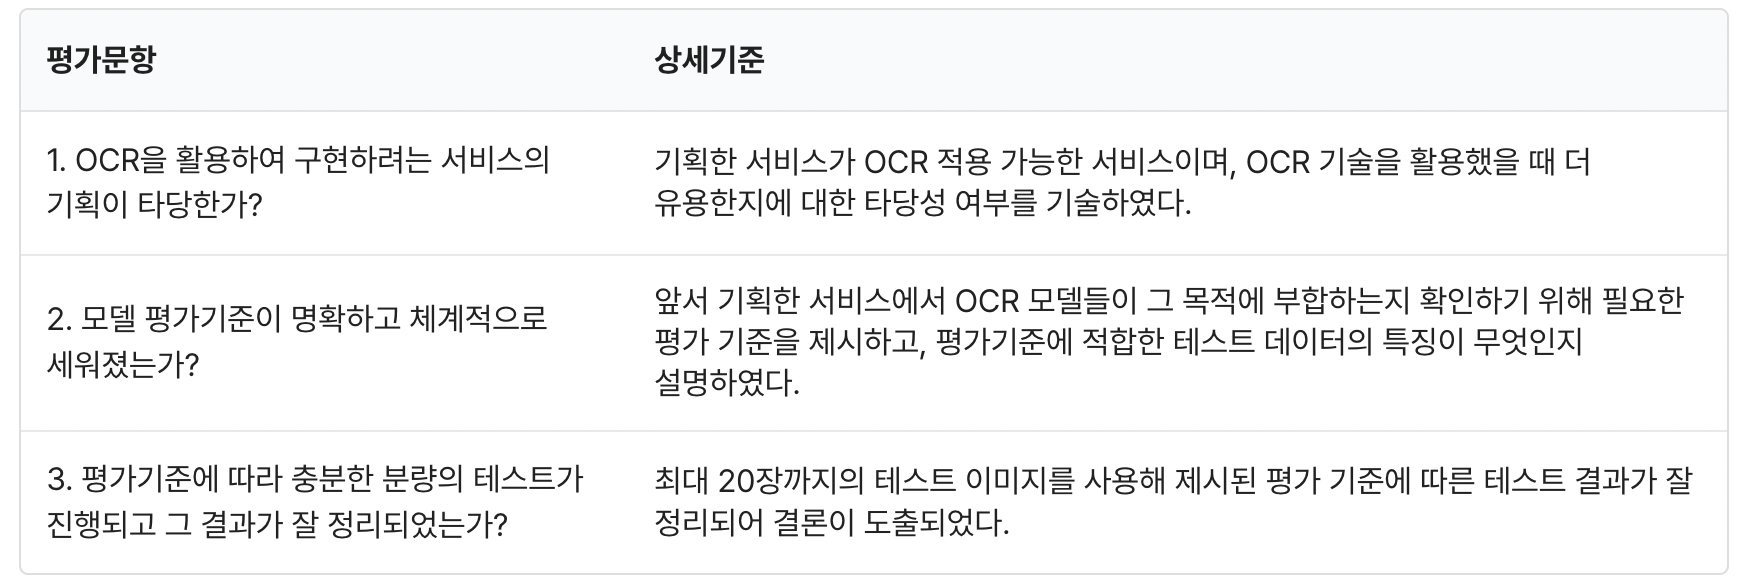

## Step1. 검증용 데이터셋 준비


In [50]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### 1) Keras-ocr

In [11]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
import os

image_paths = [
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_1.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_2.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_3.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_4.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_5.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_6.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/sample/keras_ocr/AnyConv.com__eng_7.jpg'
]

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

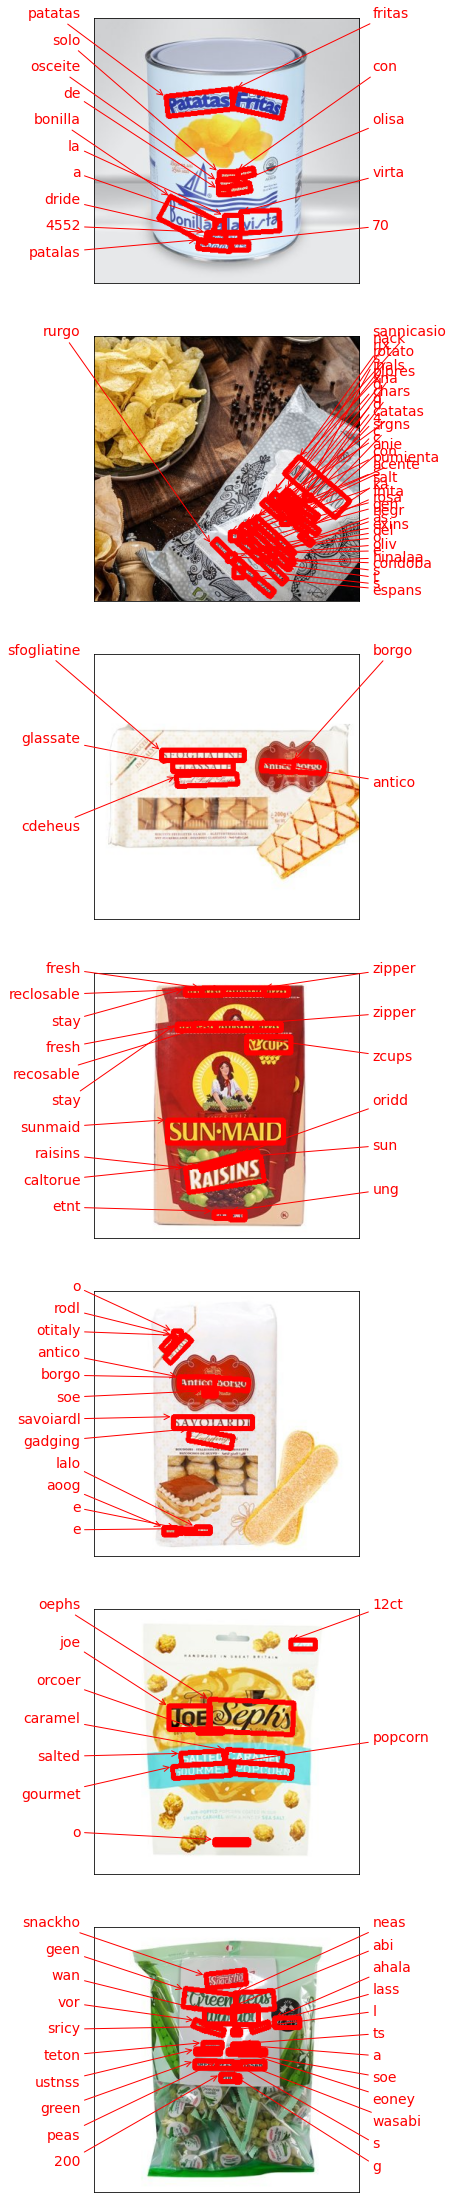

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2) Tesseract

In [48]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt



def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/kor.jpg'
img_file_path = work_dir + '/kor_13.jpg'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/kor.jpg/0000.png
/aiffel/aiffel/ocr_python/kor.jpg/0001.png
/aiffel/aiffel/ocr_python/kor.jpg/0002.png
/aiffel/aiffel/ocr_python/kor.jpg/0003.png
/aiffel/aiffel/ocr_python/kor.jpg/0004.png
/aiffel/aiffel/ocr_python/kor.jpg/0005.png
/aiffel/aiffel/ocr_python/kor.jpg/0006.png
/aiffel/aiffel/ocr_python/kor.jpg/0007.png
/aiffel/aiffel/ocr_python/kor.jpg/0008.png
/aiffel/aiffel/ocr_python/kor.jpg/0009.png
/aiffel/aiffel/ocr_python/kor.jpg/0010.png
/aiffel/aiffel/ocr_python/kor.jpg/0011.png
/aiffel/aiffel/ocr_python/kor.jpg/0012.png
/aiffel/aiffel/ocr_python/kor.jpg/0013.png
/aiffel/aiffel/ocr_python/kor.jpg/0014.png


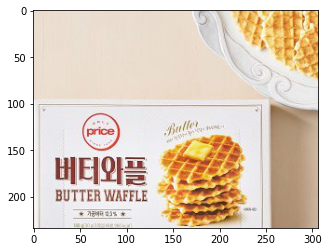

가



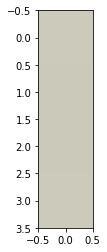

:



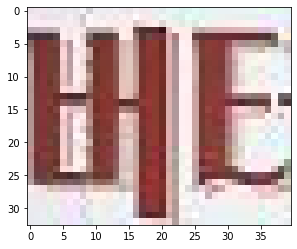

바



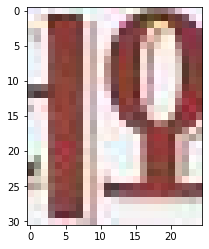

보,



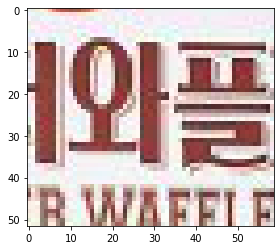

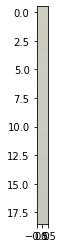

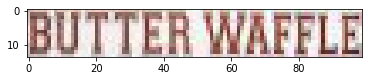

8101 ]타너나



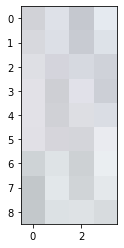

”



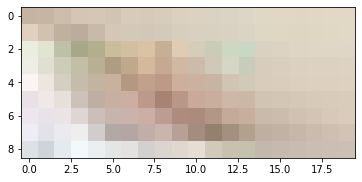

\



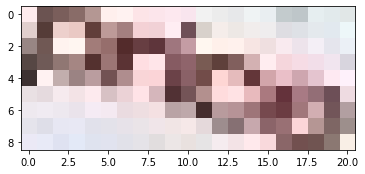

아서 수 기



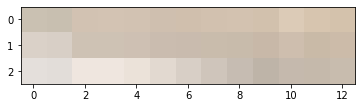

”--…



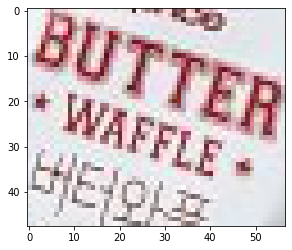

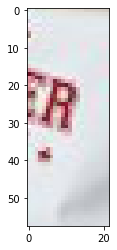

들



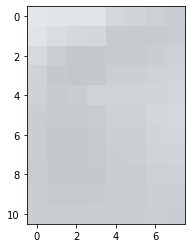

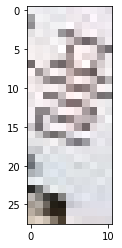


Done


In [49]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images_kor(cropped_image_path_list)

읭,,,? 정녕이게 다인가ㅋㅋㅋㅋ

## Step3. 테스트 결과 정리
#### keras-ocr
- 모두를 인식하진 않지만 대부분의 철자를 잘 인식해서 어느정도 과자에 대한 정보를 알 수있다
- 한글을 지원하지않아 불편했다.
- 출력형태가 해당이미지에서 인식한 텍스트를 바운딩박스로 표시해주고, 바운딩박스에 연결된 화살표에 인식된 텍스트를 표시해주어 보기 편했다
#### tesseract
- 한글을 지원했지만 출력되는 정확도가 높지 않다
- 다양한 이미지와 섞여있는 한글의 경우 글자와 이미지가 
- 이미지의 화질이 낮았긴했지만, 제대로 인식한 텍스트가 많지는 않다.
- keras-ocr보다 성능이 낮다고 판단된다.



## Step4. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다
### 구현하고자하는 서비스
: 저시력자나 시각장애가 있는 사람들이 과자봉지만 가지고 어떤 과자인지 구분하기 어렵기때문에 카메라를 통해 어떤 과자봉지인지 인식하고, 해당 사진에 있는 텍스트를 읽어주는 서비스를 구현하고자합니다.

### 서비스를 구현하기위한 평가 기준
- 한글을 지원해야함
- 전체적인 글자들을 인식해야됨
- 오차율이 적어야함
- 모델선정
    - keras-ocr의 경우 영어만 지원하기 때문에 한국에서 사용할 수는 없다.(가장 큰 아쉬움)
    - 하지만 tesseract는 한국어를 인식하지만 정확도가 떨어져 좋은 모델이라 할 수 없다.
    - kera-ocr은 전제이미지에서 텍스트를 한번에 인식하고 tesseract는 텍스트를 위에서 아래로, 왼쪽에서 오른쪽으로 부분 인식한다.
    - keras-ocr의 장점들과 tesseract의 장점이 합쳐진 모델이 있다면 좋을 것같다.

### ✏️회고
이번 모델은 데이터를 모으고 정리하는데 시간을 더 많이 쓴것 같다. 좋은 화질의 과자사진을 구하는 것이 생각보다 어려웠다. 또한 봉지의 경우 불빛에 반사되는 부분도 많아 정확히 학습이 될지에 대한 의문이 있었다.
그런데 keras-ocr에서 텍스트 출력은 잘되어 시작이 좋았다고 생각이 들었으나 tesseract의 경우 예상한것 보다 너무 텍스트 출력의 정확도가 낮아서 실망한부분도 있었다. 두가지 모델은 서로 출력하는 방식이 달라서 원하는 서비스에 따라 선택지도 달라지는것같다.

실습 중 원래는 코랩을 활용해 하고있다가. tesseract를 진행할때 막혔었다.. 이유는 crop_word_regions()을 구현하는데 있어서 이미지들의 주소부분들이 말썽이었다. 그리고 디렉토리를 새로 만드는등 코랩에서 진행하기에는 나에게는 많은 어려움이있었다. 그래서 다시 주피터로 실행하여 어느정도 마무리를 할 수 있었다. 이번에도 쉽진 않았다,,,🥹